In [2]:
import urllib.request
import os
datapath = os.path.join("datasets", "forestfires", "")
os.makedirs(datapath, exist_ok=True)
file_path = "https://raw.githubusercontent.com/robd123/AML/main/Project1/forestfires.csv"
urllib.request.urlretrieve(file_path, datapath + "forestfires.csv")

('datasets/forestfires/forestfires.csv',
 <http.client.HTTPMessage at 0x7fa203b9f2d0>)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
forest_fires = pd.read_csv(datapath + "forestfires.csv", thousands=',')
forest_fires_with_area = forest_fires[forest_fires['area'] > 0.00]

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
138  9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  42   2.7   0.0   0.36
139  1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  38   2.2   0.0   0.43
140  2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0   0.47
141  1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0   0.55
142  8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0   0.61
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17
510  6  5   aug  fri  91.0  166.9  752.6   7.1  18.2  62   5.4   0.0   0.43
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16

[270 rows x 13 columns]


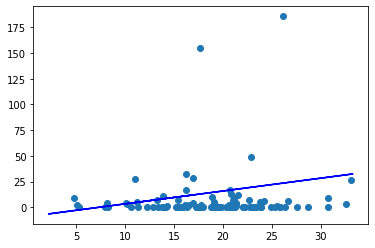

In [28]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x_vals = np.c_[forest_fires['temp']]
y_vals = np.c_[forest_fires['area']]

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=1234)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train, y_train)
t0, t1 = lin_reg.intercept_[0], lin_reg.coef_[0][0]



plt.scatter(x_test, y_test)
plt.plot(x_train, t0 + t1 * x_train, "b")
plt.show()
